# 导入包

In [2]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# matplotlib图像字体设置

In [3]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# 获取测试数据集，并实时数据归一化和批次

In [4]:
def get_test_data_generator(model,test_path):
    """获取测试数据集，并实时数据归一化和批次
    Args:
        model ([type]): 模型

    Returns:
        [type]: 数据集
    """
    test_datagen = ImageDataGenerator(rescale=1. / 255)
    test_generator = test_datagen.flow_from_directory(
                        test_path,  # 数据存放路径
                        target_size=(299, 299),  # 目标形状
                        batch_size=32,  # 批数量大小
                        class_mode='categorical',  # 二分类使用binary
                        # "categorical" ：2D one-hot encoded labels
                        # "binary" will be 1D binary labels
                        shuffle=False  # 是否打乱
                    )

    return test_generator


# 定义绘制混淆矩阵函数，打印出准确率

In [5]:
def show_heatmaps(title, x_labels, y_labels, harvest, save_path):
    """绘制混淆矩阵

    Args:
        title ([type]): 图标标题
        x_labels ([type]): x轴标签
        y_labels ([type]): y轴标签
        harvest ([type]): 混淆矩阵数据
        save_path ([type]): 保存路径
    """
    # 这里是创建一个画布
    fig, ax = plt.subplots()
    # cmap https://blog.csdn.net/ztf312/article/details/102474190
    im = ax.imshow(harvest, cmap="OrRd")  # cmap是颜色配置
    # 这里是修改标签
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(y_labels)))
    ax.set_yticks(np.arange(len(x_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(y_labels)
    ax.set_yticklabels(x_labels)

    # 因为x轴的标签太长了，需要旋转一下，更加好看
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # 添加每个热力块的具体数值
    # Loop over data dimensions and create text annotations.
    for i in range(len(x_labels)):
        for j in range(len(y_labels)):
            text = ax.text(j, i, round(harvest[i, j], 2),
                           ha="center", va="center", color="black")
    ax.set_xlabel("Predict label")
    ax.set_ylabel("Actual label")
    ax.set_title(title)
    fig.tight_layout()
    plt.colorbar(im)
    plt.savefig(save_path, dpi=600)
    plt.show()
    print('绘制完成，已退出')

# 对数据集预测函数

In [13]:
def predict_dataset(model_save_path,confusion_matrix_save_path,test_path,is_plot_confusion_matrix):
    # 加载模型
    model = tf.keras.models.load_model(model_save_path)
    # 获得预测数据集
    test_generator = get_test_data_generator(model,test_path)
    print(test_generator.class_indices)
    class_names = []
    # 取出每个类别的标签，并存入列表
    for label in test_generator.class_indices:
        class_names.append(label)
    # 对所有数据集进行预测
    result = model.predict(test_generator)
    print(result)
    # 得到模型预测的标签
    predict_labels_list = []
    for item in result:
        index = np.argmax(item, axis=0)  #! axis=1报错
        predict_labels_list.append(index)
    print(predict_labels_list)
    true_labels_list = test_generator.labels  # 真实标签
    if is_plot_confusion_matrix:
        # 方法一：打印具体的分类结果的数值，方便数据的分析和各类指标的计算
        # cmap：热力图颜色，配置方案参考这篇博客：https://blog.csdn.net/ztf312/article/details/102474190
        sns.heatmap(confusion_matrix(true_labels_list,predict_labels_list),annot=True,cmap="YlGnBu")
        plt.ylabel('True label'); plt.xlabel('Predicted Label')
        plt.yticks(np.arange(0.5, len(class_names)), labels=class_names, rotation=0);
        plt.xticks(np.arange(0.5, len(class_names)), labels=class_names, rotation=45)
        plt.title('My Model Prediction Over Test Set')
        plt.tight_layout()
        plt.savefig(save_path, dpi=600)
        plt.show()

    if is_plot_confusion_matrix == False:
        # 方法二：打印出每一个类别的分类准确率。
        class_names_length = len(class_names)
        heat_maps = np.zeros((class_names_length, class_names_length))
        for test_real_label, test_pre_label in zip(true_labels_list, predict_labels_list):
            heat_maps[test_real_label][test_pre_label] = heat_maps[test_real_label][test_pre_label] + 1
        print(heat_maps)
        heat_maps_sum = np.sum(heat_maps, axis=1).reshape(-1, 1)

        heat_maps_float = heat_maps / heat_maps_sum
        print(heat_maps_float)
        # title, x_labels, y_labels, harvest
        show_heatmaps(title="Confusion Matrix",
                        x_labels=class_names, 
                        y_labels=class_names, 
                        harvest=heat_maps_float,
                        save_path=confusion_matrix_save_path)


# 进入工作区

In [7]:
cd /content/drive/MyDrive/Transfer_learning

/content/drive/MyDrive/Transfer_learning


# 定义路径

In [8]:
model_save_path = "model/data_scidb_model_InceptionV3.h5"
confusion_matrix_save_path = "result/confusion_matrix_InceptionV3_2.png"
test_path = "data/new_paddle_mineral_data/test"

# 预测并绘制混淆矩阵

Found 264 images belonging to 10 classes.
{'erli': 0, 'gls': 1, 'hym': 2, 'hzs': 3, 'jqs': 4, 'jss': 5, 'pths': 6, 'slzs': 7, 'szs': 8, 'yqs': 9}


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


[[9.9974519e-01 1.0031258e-08 1.1629989e-07 ... 1.1143424e-10
  1.6270908e-05 2.3801631e-04]
 [8.9005613e-01 5.8953711e-03 1.4597306e-05 ... 1.9888456e-03
  6.1090835e-03 3.6721888e-03]
 [1.0000000e+00 4.6996803e-12 9.9130489e-11 ... 9.1771806e-16
  7.9935112e-12 4.4073648e-10]
 ...
 [2.7823515e-05 3.0394951e-09 1.3983479e-03 ... 2.6792619e-05
  1.8975824e-08 9.9842358e-01]
 [1.5052815e-04 4.3696535e-09 1.8813385e-04 ... 1.2349344e-05
  2.6672112e-07 9.9964035e-01]
 [3.4338452e-08 3.3853067e-15 2.9305303e-09 ... 3.7829707e-07
  6.8296258e-09 9.9999642e-01]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 5, 5, 

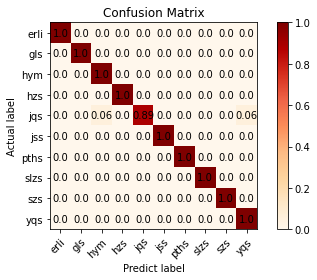

绘制完成，已退出


In [14]:
predict_dataset(model_save_path=model_save_path,
        confusion_matrix_save_path=confusion_matrix_save_path,
        test_path=test_path,
        is_plot_confusion_matrix= False)